In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import matplotlib.ticker as mticker
from matplotlib import *
from mpl_toolkits.basemap import Basemap
################################################################   

def update_ticks(x, pos):
    if x == 0:
        return '0h'
    elif x< 0:
        return str('%d'%(12+x))+'PM'
    else:
        return str('%d'%x)+'AM'
################################################################   
def setcolor(x, color='black'):
     for m in x:
        for t in x[m][1]:
            t.set_color(color)
            s = t.get_text()
            n = len(s)
     
            if s[-1] != 'W' and s[-1] != 'E' and  s[-1] != 'N' and s[-1] != 'S':
               number = int(s[0:n-1])
            else:
                number = int(s[0:n-2])    
               
            if s[-1] == 'W' or s[-1] == 'S':
                number *= -1
               
            if s[-1] == 'W':
                number += 360
            
            number = (number+270)%360
            s = str(number)
            if number==0: s='N'
            elif number==90: s='E'
            elif number==180: s='S'
            elif number==270: s='W'
            else: s = u''+s+u'\xb0'

            t.set_text(s)

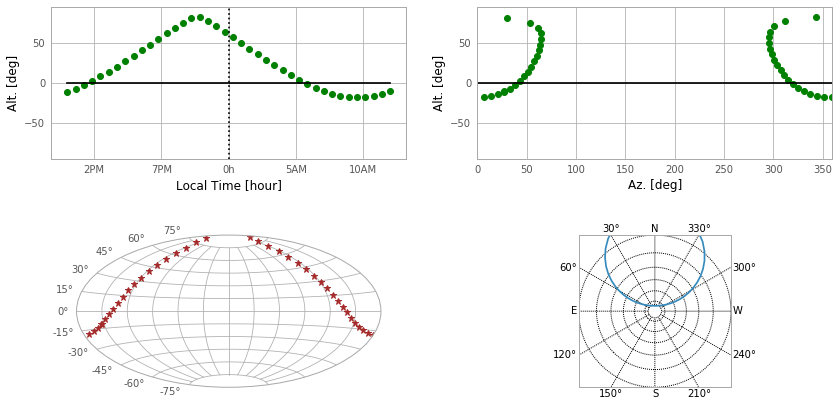

In [2]:
### Object Coordinates
RA  = 200
Dec = 40

observatory = "kpno"
name = "Kitt Peak National Observatory"
### Observatory Properties
Lon = 111.5997 
Lat = 31.9599   
Height = 2120.      # meter 
UToff  = 7

### Night of Observation starting at 2019-5-11 18:00:00
obsTime = '2019-5-12 00:00:00'

obj = SkyCoord(RA, Dec, unit="deg")  # defaults to ICRS frame
bear_mountain = EarthLocation(lat=Lat*u.deg, lon=Lon*u.deg, height=Height*u.m)
utcoffset = UToff*u.hour  # Eastern Daylight Time


midnight = Time(obsTime) - utcoffset
fromMidnight = np.linspace(-12, 12, 40)
localTime = (fromMidnight+24)%24
delta_midnight = fromMidnight*u.hour
obj_timeFrame = AltAz(obstime = midnight+delta_midnight, location = bear_mountain)
obj_night = obj.transform_to(obj_timeFrame)


obj_airmass = obj_night.secz
obj_zenith = obj_night.zen
obj_alt = obj_night.alt.degree
obj_az = obj_night.az.degree


################## Plotting
plt.figure(figsize=(14,7))

################## new plot (Alt-Time)
ax = plt.gcf().add_subplot(2,2,1)
ax.plot(delta_midnight, obj_alt, 'go')
ax.plot([-12,12], [0,0], 'k-')
ax.plot([0,0], [-95,95], 'k:')
# ax.set_xlim(-12, 12)
ax.set_ylim(-95, 95)
ax.set_xlabel('Local Time [hour]')
ax.set_ylabel('Alt. [deg]')
ax.xaxis.set_major_formatter(mticker.FuncFormatter(update_ticks))

################## new plot (AltAz)
ax = plt.gcf().add_subplot(2,2,2)
ax.plot(obj_az, obj_alt, 'go')
ax.plot([0,360], [0,0], 'k-')
ax.set_xlim(0,360)
ax.set_ylim(-95, 95)
ax.set_xlabel('Az. [deg]')
ax.set_ylabel('Alt. [deg]')

################## new plot (Aitoff Projection)
ax = plt.gcf().add_subplot(2,2,3, projection="aitoff")
ax.set_xticklabels([])
for j in range(len(obj_az)):
    ax.plot((obj_az[j]-180)*np.pi/180., obj_alt[j]*np.pi/180., '*', markersize = 7, color='brown')


################## new plot (Polar Stereographic Projection)
ax = plt.gcf().add_subplot(2,2,4)
map = Basemap(projection='npstere',boundinglat=0,lon_0=270,ax=ax)
paral = map.drawparallels(np.arange(0.,90.,15.))
merid = map.drawmeridians(np.arange(0,360,30.), labels=[1,1,1,1])
setcolor(paral,'b')
setcolor(merid,'black')
x, y = map((obj_az+90), obj_alt)
map.plot(x,y)

plt.show()

Text(0.5,0,'$\\rm RA[deg.]$')

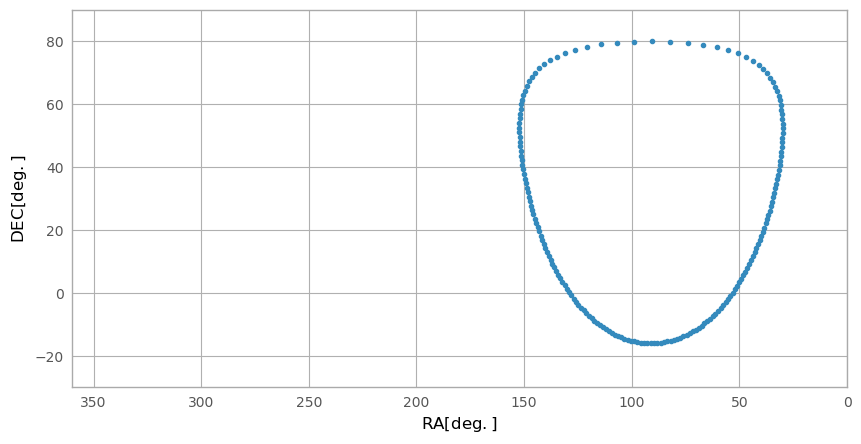

In [3]:
from datetime import datetime
from astropy.time import Time, TimezoneInfo

observatory = "kpno"
name = "Kitt Peak National Observatory"
Lon = 111.5997 
Lat = 31.9599   
Height = 2120.      # meter 


UTCoffset = -8*u.hour  # Mountain Standard Time
obstime = Time('2020-1-1 00:00:00') + UTCoffset

obj = SkyCoord(RA, Dec, unit="deg")  # defaults to ICRS frame
loc = EarthLocation(lat=Lat*u.deg, lon=Lon*u.deg, height=Height*u.m)
utcoffset = UToff*u.hour  
obsTime = Time(obsTime) + utcoffset

zenithangle = 48  # deg The zenith angle at which airmass equals 1.5
az = np.arange(0,360,2)
alt = az*0 + (90 - zenithangle)


newAltAzcoordiantes = SkyCoord(alt = alt, az = az, obstime = obstime, frame = 'altaz', location = loc, unit="deg")
ra = newAltAzcoordiantes.icrs.ra.deg
dec = newAltAzcoordiantes.icrs.dec.deg


fig=plt.figure(figsize=(10, 5), dpi=100)
ax= fig.add_subplot(111)
plt.plot(ra,dec,'.')

ax.set_xlim([360,0])
ax.set_ylim([-30,90])

ax.set_ylabel(r'$\rm DEC[deg.]$', fontsize=12)
ax.set_xlabel(r'$\rm RA[deg.]$', fontsize=12)

Text(0.5,0,'$\\rm RA[deg.]$')

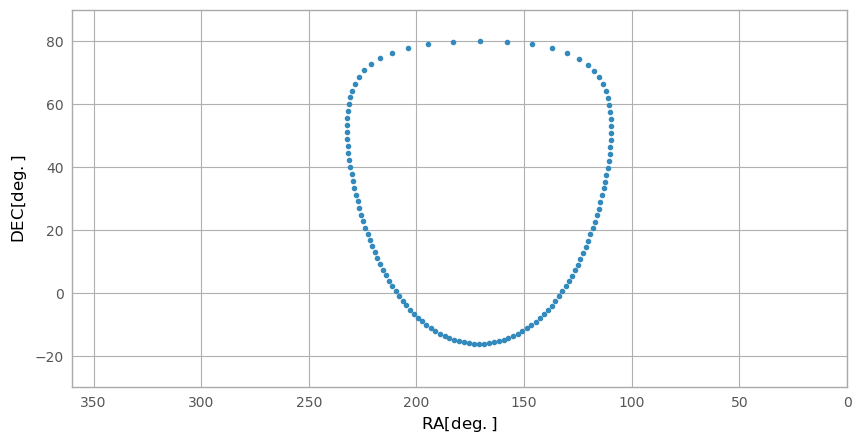

In [6]:
from datetime import datetime as dt
import time

## skyCircle(TIME, DATE)
## TIME = [0,0,0]      # h,m,s
## DATE = [2019,3,20]  # y,m,d

def skyCircle(tt, dd):
    
    ds = str(dd[0])+'-'+str(dd[1])+'-'+str(dd[2])
    ts = str(tt[0])+':'+str(tt[1])+':'+str(tt[2])
    observatory = "kpno"
    name = "Kitt Peak National Observatory"
    Lon =  -(111 + 35/60. + 59.6/3600)
    Lat = 31.9599   
    Height = 2120.      # meter     
    
    
    obsTime = dt(dd[0],dd[1],dd[2],tt[0],tt[1],tt[2])
    reference = dt(2000,1,1,12,0,0)           # UTCref
    reference = time.mktime(reference.timetuple())
    obsTime   = time.mktime(obsTime.timetuple()) + 7*3600
    deltaT = (obsTime-reference) / (24*3600);
    
    # Convert to LST
    LST_hours = ((18.697374558 + 24.06570982441908 * deltaT) + Lon/15.) % 24;
    LST_degrees = LST_hours * 15


    obsTime = Time(ds+' '+ts)
    loc = EarthLocation(lat=Lat*u.deg, lon=Lon*u.deg, height=Height*u.m)

    zenithangle = 48.19  # deg The zenith angle at which airmass equals 1.5
    az = np.arange(0,360,3)
    alt = az*0 + (90 - zenithangle)

    newAltAzcoordiantes = SkyCoord(alt = alt, az = az, obstime = obsTime, frame = 'altaz', location = loc, unit="deg")
    ra = newAltAzcoordiantes.icrs.ra.deg
    dec = newAltAzcoordiantes.icrs.dec.deg
   
    newAltAzcoordiantes = SkyCoord(alt = [90], az = [90], obstime = obsTime, frame = 'altaz', location = loc, unit="deg")
    ra0 = newAltAzcoordiantes.icrs.ra.deg
    ra0 = ra0[0]
    ra0 = (ra-ra0)%360
    ra = (ra0+LST_degrees)%360
    
    return ra, dec
#########################

TT = [0,0,0]      # h,m,s
DD = [2019,3,20]  # y,m,d
ra, dec = skyCircle(TT, DD)


fig=plt.figure(figsize=(10, 5), dpi=100)
ax= fig.add_subplot(111)
plt.plot(ra,dec,'.')

ax.set_xlim([360,0])
ax.set_ylim([-30,90])

ax.set_ylabel(r'$\rm DEC[deg.]$', fontsize=12)
ax.set_xlabel(r'$\rm RA[deg.]$', fontsize=12)